In [ ]:
## Find the index where the document is similar
np.fill_diagonal(array, np.nan)   

In [ ]:
UN = ' '.join(unknown)
index = document.index(UN) 
index

In [ ]:
result = np.nanargmax(array[index])                                                                                                                                                                                                                
# document[result]
result

#### Proprocessing 
1. clean - remove links, numbers, and special characters
2. Tokenize  -  word_tokenize
3. Remove Stopwords  - NLTK’s built in stopwords
4. Lemmatize  - WordNetLemmatizer
-----------------------------------------
5. Bag of words (BOW)  -  unigram token frequency
6. Parts of Speech   - Penn Treebank P.O.S
7. Sentiment    - VADER (Valence Aware Dictionary for Sentiment Reasoning)
8. WordtoVec   - maps an entire text corpus into a vector space
----------------------------------------
Features for prediction: <b> Linear Support Vector Machine (SVM) Neural Network  </b>
- BOW
- BOW + POS
- BOW + POS + SENT
- W2V + POS
- W2V + POS + SENT

### K means

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import num

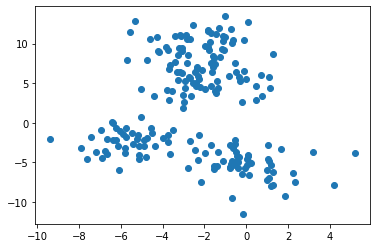

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

dataset = make_blobs(n_samples=200, centers = 4,n_features = 2, cluster_std = 1.6, random_state = 50)
points = dataset[0]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
clusters = kmeans.cluster_centers_

plt.scatter(dataset[0][:,0],dataset[0][:,1])

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Loading data...
17465344/17464789 [==============================] - 3s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\owner\desktop\project\virtualpro\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\owner\desktop\project\virtualpro\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33  

c:\users\owner\desktop\project\virtualpro\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
157/157 [==============================] - 47s 283ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 43s 276ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/10
157/157 [==============================] - 43s 277ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/10
157/157 [==============================] - 43s 273ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/10
157/157 [==============================] - 50s 321ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/10
157/157 [==============================] - 69s 437ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/10
157/157 [==============================] - 68s 436ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 8/10
157/157 [==============================] - 6